#Bitcoin Closing Price Prediction

##Import Libraries and Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv',index_col='Date')
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...
"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"


##Data Analysis

In [ ]:
accuracy_arr=[]#array to store accuracy

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1556 entries, Jul 31, 2017 to Apr 28, 2013
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1556 non-null   float64
 1   High        1556 non-null   float64
 2   Low         1556 non-null   float64
 3   Close       1556 non-null   float64
 4   Volume      1556 non-null   object 
 5   Market Cap  1556 non-null   object 
dtypes: float64(4), object(2)
memory usage: 85.1+ KB


In [ ]:
data.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


##Preprocessing

In [ ]:
data=data.drop(['Volume','Market Cap'],axis=1)
data

,Open,High,Low,Close
Date,,,,
"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34
"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18
"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45
"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01
"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78
...,...,...,...,...
"May 02, 2013",116.38,125.60,92.28,105.21
"May 01, 2013",139.00,139.89,107.72,116.99
"Apr 30, 2013",144.00,146.93,134.05,139.00


In [ ]:
data.index=pd.to_datetime(data.index)
data

,Open,High,Low,Close
Date,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34
2017-07-30,2724.39,2758.53,2644.85,2757.18
2017-07-29,2807.02,2808.76,2692.80,2726.45
2017-07-28,2679.73,2897.45,2679.73,2809.01
2017-07-27,2538.71,2693.32,2529.34,2671.78
...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21
2013-05-01,139.00,139.89,107.72,116.99
2013-04-30,144.00,146.93,134.05,139.00


In [ ]:
data = data.sort_index()
data.head()

,Open,High,Low,Close
Date,,,,
2013-04-28,135.30,135.98,132.10,134.21
2013-04-29,134.44,147.49,134.00,144.54
2013-04-30,144.00,146.93,134.05,139.00
2013-05-01,139.00,139.89,107.72,116.99
2013-05-02,116.38,125.60,92.28,105.21


Plot of Bitcoin price vs Date

Text(0, 0.5, 'Daily Bitcoin price')

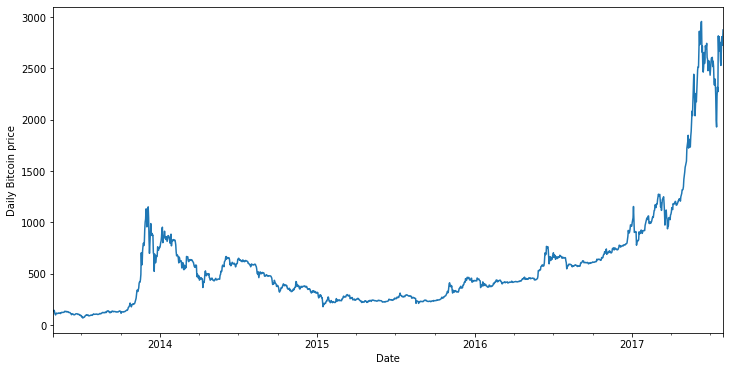

In [ ]:
plt.figure(figsize=(12,6))
data['Close'].plot()

plt.ylabel("Daily Bitcoin price")

In [ ]:
data=data.drop(['Open','High','Low',],axis=1) ##drop the open, high and low
data

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21
...,...
2017-07-27,2671.78
2017-07-28,2809.01
2017-07-29,2726.45


###Generating Features

In [ ]:
columns_name=['f1','f2','f3','f4','f5']
new=data
for i in range(1,6):
  data[columns_name[i-1]]=data['Close'].shift(periods=-i)



In [ ]:
data.tail(10)

,Close,f1,f2,f3,f4,f5
Date,,,,,,
2017-07-22,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78
2017-07-23,2730.40,2754.86,2576.48,2529.45,2671.78,2809.01
2017-07-24,2754.86,2576.48,2529.45,2671.78,2809.01,2726.45
2017-07-25,2576.48,2529.45,2671.78,2809.01,2726.45,2757.18
2017-07-26,2529.45,2671.78,2809.01,2726.45,2757.18,2875.34
2017-07-27,2671.78,2809.01,2726.45,2757.18,2875.34,NaN
2017-07-28,2809.01,2726.45,2757.18,2875.34,NaN,NaN
2017-07-29,2726.45,2757.18,2875.34,NaN,NaN,NaN
2017-07-30,2757.18,2875.34,NaN,NaN,NaN,NaN


In [ ]:
data=data.iloc[0:len(data)-5,:]
data.tail(10)

,Close,f1,f2,f3,f4,f5
Date,,,,,,
2017-07-17,2228.41,2318.88,2273.43,2817.60,2667.76,2810.12
2017-07-18,2318.88,2273.43,2817.60,2667.76,2810.12,2730.40
2017-07-19,2273.43,2817.60,2667.76,2810.12,2730.40,2754.86
2017-07-20,2817.60,2667.76,2810.12,2730.40,2754.86,2576.48
2017-07-21,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45
2017-07-22,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78
2017-07-23,2730.40,2754.86,2576.48,2529.45,2671.78,2809.01
2017-07-24,2754.86,2576.48,2529.45,2671.78,2809.01,2726.45
2017-07-25,2576.48,2529.45,2671.78,2809.01,2726.45,2757.18


###Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data=scaler.transform(data)


In [ ]:
data=pd.DataFrame(data,columns=[['Close','f1','f2','f3','f4','f5']])

In [ ]:
x=data.iloc[:,[1,2,3,4,5]]
y=data.iloc[:,[0]]
x

,f1,f2,f3,f4,f5
0,0.026339,0.024421,0.016805,0.012728,0.010146
1,0.024421,0.016805,0.012728,0.010146,0.015251
2,0.016805,0.012728,0.010146,0.015251,0.016431
3,0.012728,0.010146,0.015251,0.016431,0.015182
4,0.010146,0.015251,0.016431,0.015182,0.014905
...,...,...,...,...,...
1546,0.921199,0.929663,0.867933,0.851658,0.900913
1547,0.929663,0.867933,0.851658,0.900913,0.948403
1548,0.867933,0.851658,0.900913,0.948403,0.919832
1549,0.851658,0.900913,0.948403,0.919832,0.930466


##Train Test Split

In [ ]:
train_size = int(len(data) * 0.7)
test_size = len(data) - train_size
train, test = data.iloc[0:train_size,:], data.iloc[train_size:len(data),:]
train

,Close,f1,f2,f3,f4,f5
0,0.022764,0.026339,0.024421,0.016805,0.012728,0.010146
1,0.026339,0.024421,0.016805,0.012728,0.010146,0.015251
2,0.024421,0.016805,0.012728,0.010146,0.015251,0.016431
3,0.016805,0.012728,0.010146,0.015251,0.016431,0.015182
4,0.012728,0.010146,0.015251,0.016431,0.015182,0.014905
...,...,...,...,...,...,...
1080,0.123460,0.122955,0.123145,0.125024,0.125322,0.124225
1081,0.122955,0.123145,0.125024,0.125322,0.124225,0.124637
1082,0.123145,0.125024,0.125322,0.124225,0.124637,0.127031
1083,0.125024,0.125322,0.124225,0.124637,0.127031,0.129066


In [ ]:
test

,Close,f1,f2,f3,f4,f5
1085,0.124225,0.124637,0.127031,0.129066,0.131849,0.130572
1086,0.124637,0.127031,0.129066,0.131849,0.130572,0.132143
1087,0.127031,0.129066,0.131849,0.130572,0.132143,0.135008
1088,0.129066,0.131849,0.130572,0.132143,0.135008,0.136001
1089,0.131849,0.130572,0.132143,0.135008,0.136001,0.137614
...,...,...,...,...,...,...
1546,0.948787,0.921199,0.929663,0.867933,0.851658,0.900913
1547,0.921199,0.929663,0.867933,0.851658,0.900913,0.948403
1548,0.929663,0.867933,0.851658,0.900913,0.948403,0.919832
1549,0.867933,0.851658,0.900913,0.948403,0.919832,0.930466


In [ ]:
x_train=train.iloc[:,[1,2,3,4,5]]
y_train=train.iloc[:,[0]]
x_test=test.iloc[:,[1,2,3,4,5]]
y_test=test.iloc[:,[0]]
x_train

,f1,f2,f3,f4,f5
0,0.026339,0.024421,0.016805,0.012728,0.010146
1,0.024421,0.016805,0.012728,0.010146,0.015251
2,0.016805,0.012728,0.010146,0.015251,0.016431
3,0.012728,0.010146,0.015251,0.016431,0.015182
4,0.010146,0.015251,0.016431,0.015182,0.014905
...,...,...,...,...,...
1080,0.122955,0.123145,0.125024,0.125322,0.124225
1081,0.123145,0.125024,0.125322,0.124225,0.124637
1082,0.125024,0.125322,0.124225,0.124637,0.127031
1083,0.125322,0.124225,0.124637,0.127031,0.129066


##Algorithms

###Decision Tree Classifier

Decision Tree Classifier with different hyperparameters

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
Criterion=['squared_error']

for info in Criterion:
  for i in range (5,15):
    for j in range (2,10):
      for k in range (2,20):
        cls=DecisionTreeRegressor(criterion=info, max_depth=i,max_leaf_nodes=2*k,min_samples_split=j,random_state=42)
        cls.fit(x_train,y_train)
        y_pred=cls.predict(x_test)
        x_pred=cls.predict(x_train)
        # if metrics.r2_score(y_test,y_pred)>0.3:
        print(info,i,j,k,metrics.r2_score(y_test,y_pred))

squared_error 5 2 2 -0.02784567239926905
squared_error 5 2 3 -0.02586034221981559
squared_error 5 2 4 0.20565380622655172
squared_error 5 2 5 0.20739792514369004
squared_error 5 2 6 0.20814172094055994
squared_error 5 2 7 0.2080356165312124
squared_error 5 2 8 0.279281936679907
squared_error 5 2 9 0.2793589751039075
squared_error 5 2 10 0.27880091422972664
squared_error 5 2 11 0.27876257091599377
squared_error 5 2 12 0.2787999521959239
squared_error 5 2 13 0.23796649649922386
squared_error 5 2 14 0.23796649649922386
squared_error 5 2 15 0.23798241028880684
squared_error 5 2 16 0.23798241028880684
squared_error 5 2 17 0.23798241028880684
squared_error 5 2 18 0.23798241028880684
squared_error 5 2 19 0.23798241028880684
squared_error 5 3 2 -0.02784567239926905
squared_error 5 3 3 -0.02586034221981559
squared_error 5 3 4 0.20565380622655172
squared_error 5 3 5 0.20739792514369004
squared_error 5 3 6 0.20814172094055994
squared_error 5 3 7 0.2080356165312124
squared_error 5 3 8 0.2792819366

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(criterion='squared_error', max_depth=8,max_leaf_nodes=16,min_samples_split=2,random_state=42)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
metrics.r2_score(y_test,y_pred)


0.279281936679907

In [ ]:
accuracy_arr.append(metrics.r2_score(y_test,y_pred))

In [ ]:
y_pred=pd.DataFrame(y_pred)

In [ ]:
# plt.figure(figsize=(12,6))
y_test=np.array(y_test)
y_pred=np.array(y_pred)

In [ ]:
print(len(y_test))
print(len(y_pred))

466
466


Plot to compare price vs Days

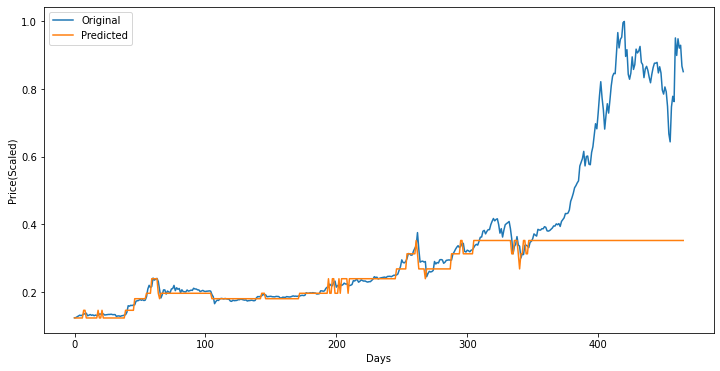

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(range(466)),y_test,label='Original')
plt.plot(np.array(range(466)),y_pred,label='Predicted')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Price(Scaled)')
plt.show()

###XGB (Shallow)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Implement model with differnet learning rate

In [ ]:
import xgboost as xgb
for i in range(1,40):
  XGB = xgb.XGBRegressor(max_depth=2,learning_rate=0.01*i)
  XGB.fit(x_train,y_train)
  y_pred=XGB.predict(x_test)
  k=XGB.predict(x_train)
  print(metrics.r2_score(y_test,y_pred),i)

[16:09:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.17208803954378682 1
[16:09:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.1848033144809601 2
[16:09:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.21771527439863314 3
[16:09:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.2489033985625977 4
[16:09:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.2748557116594287 5
[16:09:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.29463317170317516 6
[16:09:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

In [ ]:
XGB = xgb.XGBRegressor(max_depth=2,learning_rate=0.01*35)
XGB.fit(x_train,y_train)
y_pred=XGB.predict(x_test)
k=XGB.predict(x_train)
print(metrics.r2_score(y_test,y_pred))

[16:30:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.40378854979143264


In [ ]:
accuracy_arr.append(metrics.r2_score(y_test,y_pred))

Plot of Price vs Days

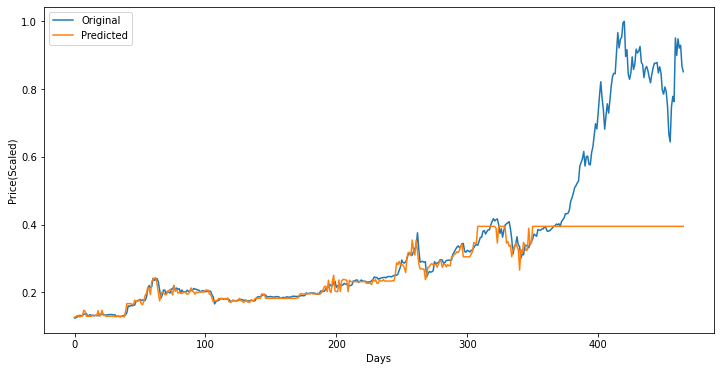

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(range(466)),y_test,label='Original')
plt.plot(np.array(range(466)),y_pred,label='Predicted')
plt.xlabel('Days')
plt.ylabel('Price(Scaled)')
plt.legend()
plt.show()

###XGB (Deep)

In [ ]:
import xgboost as xgb
for i in range(1,40):
  XGB = xgb.XGBRegressor(max_depth=12,learning_rate=0.01*i)
  XGB.fit(x_train,y_train)
  y_pred=XGB.predict(x_test)
  k=XGB.predict(x_train)
  print(metrics.r2_score(y_test,y_pred),i)

[15:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.3085498983792576 1
[15:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.3540197165949912 2
[15:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.3468195905819763 3
[15:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.33887377559520726 4
[15:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.33770794849281505 5
[15:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.3319496902480229 6
[15:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of r

In [ ]:
XGB = xgb.XGBRegressor(max_depth=12,learning_rate=0.01*26)
XGB.fit(x_train,y_train)
y_pred=XGB.predict(x_test)
k=XGB.predict(x_train)
print(metrics.r2_score(y_test,y_pred))

[16:31:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.3707536261331913


Plot of Price vs Days

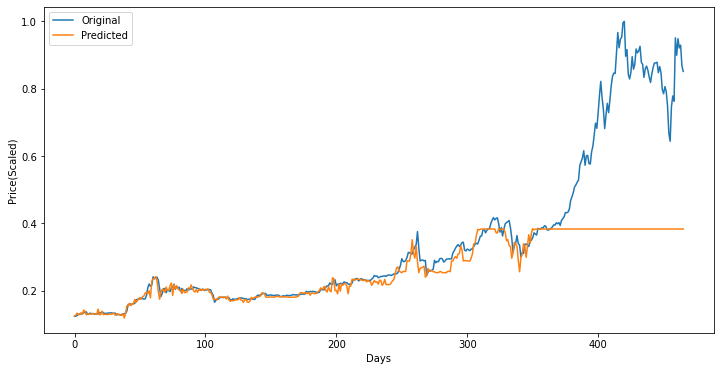

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(range(466)),y_test,label='Original')
plt.plot(np.array(range(466)),y_pred,label='Predicted')
plt.xlabel('Days')
plt.ylabel('Price(Scaled)')
plt.legend()
plt.show()

###Linear Regression

Implement Model

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print(metrics.r2_score(y_test,y_pred))

0.9926650271996021


In [ ]:
accuracy_arr.append(metrics.r2_score(y_test,y_pred))

Plot of Price vs Days

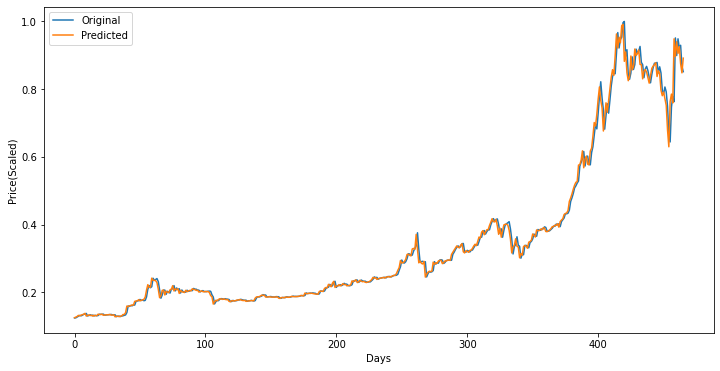

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(range(466)),y_test,label='Original')
plt.plot(np.array(range(466)),y_pred,label='Predicted')
plt.xlabel('Days')
plt.ylabel('Price(Scaled)')
plt.legend()
plt.show()

###Random Forest

Implement Random Forest with hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=6, random_state=0,n_estimators=500)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.r2_score(y_test,y_pred)

0.22059311748223798

In [ ]:
accuracy_arr.append(metrics.r2_score(y_test,y_pred))

Plot of Price vs Days

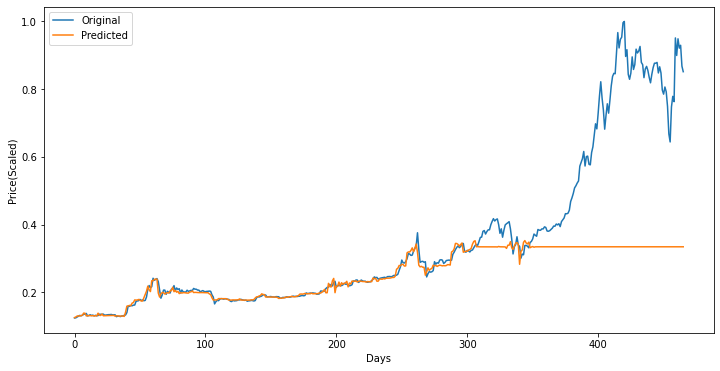

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(range(466)),y_test,label='Original')
plt.plot(np.array(range(466)),y_pred,label='Predicted')
plt.xlabel('Days')
plt.ylabel('Price(Scaled)')
plt.legend()
plt.show()

In [ ]:
x_train

array([[0.02633856, 0.02442139, 0.01680463, 0.01272805, 0.01014645],
       [0.02442139, 0.01680463, 0.01272805, 0.01014645, 0.01525082],
       [0.01680463, 0.01272805, 0.01014645, 0.01525082, 0.01643089],
       ...,
       [0.12502422, 0.12532183, 0.12422483, 0.12463664, 0.12703137],
       [0.12532183, 0.12422483, 0.12463664, 0.12703137, 0.12906619],
       [0.12422483, 0.12463664, 0.12703137, 0.12906619, 0.13184851]])

###LSTM

Import Libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
x_train=np.array(x_train)
x_test=np.array(x_test)

Change shape of numpy array

In [ ]:
trainX = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
testX = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
testY=np.array(y_test)
trainY=np.array(y_train)

Implement LSTM model

In [ ]:
lstm = Sequential()
lstm.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
lstm.add(Dense(1))
lstm.compile(loss='mae', optimizer='adam')
lstm.fit(trainX, trainY, epochs=300, batch_size=100, verbose=0, shuffle=False)

Plot of Price vs Days for comparision

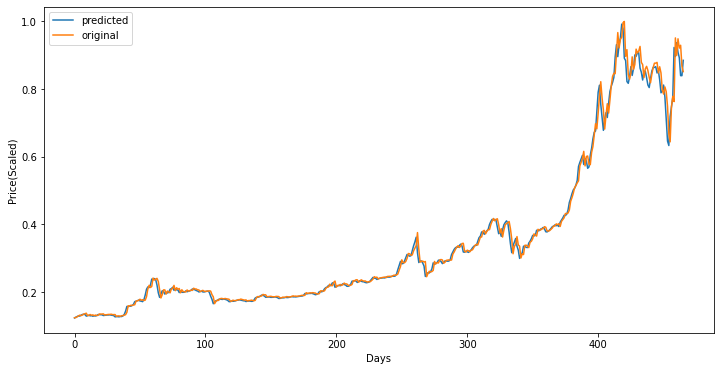

In [ ]:
y_pred = lstm.predict(testX)
plt.figure(figsize=(12,6))
plt.plot(y_pred, label='predicted')
plt.plot(testY, label='original')
plt.xlabel('Days')
plt.ylabel('Price(Scaled)')
plt.legend()
plt.show()

In [ ]:
accuracy_arr.append(metrics.r2_score(testY,y_pred))

In [ ]:
from sklearn import metrics
metrics.r2_score(testY,y_pred)

0.9923269869876313

In [ ]:
accuracy_arr

[0.279281936679907,
 0.3721088999737129,
 0.3721088999737129,
 0.40378854979143264,
 0.9926650271996021,
 0.22059311748223798,
 0.9918484860401188]

In [ ]:
accuracy_arr.pop(1)

0.3721088999737129

In [ ]:
accuracy_arr

[0.279281936679907,
 0.3721088999737129,
 0.40378854979143264,
 0.9926650271996021,
 0.22059311748223798,
 0.9918484860401188]

## R2 score Plot

In [ ]:
models=['DTR','XGB(Shallow)','XGB(Deep)','Linear Regressor','Random Forest','LSTM']

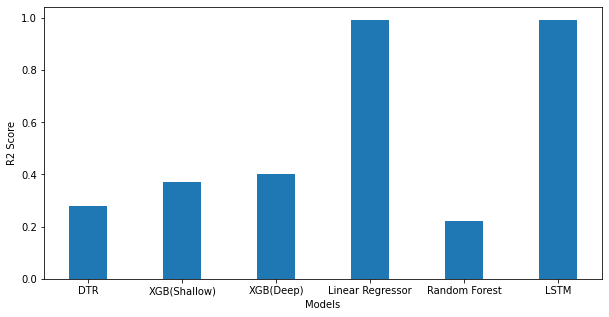

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(models,accuracy_arr ,width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("R2 Score")

plt.show()